In [75]:
import re
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from natsort import natsorted

sns.set_context("talk")

In [76]:
METRICS_CSV = Path("/Users/danie/repos/alpaca-segmentation/data_postprocessing/BENCHMARK/metrics.csv")  # adjust if saved elsewhere
assert METRICS_CSV.exists(), f"{METRICS_CSV} not found"

In [77]:

# Load the metrics CSV
df = pd.read_csv(METRICS_CSV)

df = df.set_index(["model", "variant"])
df = df.loc[natsorted(df.index)].reset_index()

# Define allowed variants (comment out those you don't want)
ALLOWED_MODELS = [
    #"v1_clipwise_balanced_nph_0.5",
    "v2_clipwise_balanced_nph_1",
    # "v3_clipwise_balanced_nph_1.5",
    # "v4_clipwise_balanced_nph_2",
    # "v5_quality_and_clipwise_balanced_nph_0.5",
    "v6_quality_and_clipwise_balanced_nph_1",
    # "v7_quality_and_clipwise_balanced_nph_1.5",
    # "v8_quality_and_clipwise_balanced_nph_2",
    # "v9_quality_balanced_nph_0.5",
    "v10_quality_balanced_nph_1",
    # "v11_quality_balanced_nph_1.5",
    # "v12_quality_balanced_nph_2",
    # "v13_random_nph_0.5",
    "v14_random_nph_1",
    # "v15_random_nph_1.5",
    # "v16_random_nph_2",
]

# Filter DataFrame to only include allowed variants
df = df[df["model"].isin(ALLOWED_MODELS)]

def parse_variant_tag(tag: str):
    """return seq_len (ms), hop (ms), threshold (float)"""
    m = re.match(r"len(\d+)_hop(\d+)_th(\d+)", tag)
    if not m:
        return None, None, None
    seq = int(m[1]) / 1000  # back to s
    hop = int(m[2]) / 1000
    th = int(m[3]) / 100
    return seq, hop, th

df[["seq_len_s", "hop_s", "threshold"]] = (
    df["variant"].apply(lambda t: pd.Series(parse_variant_tag(t)))
)

In [78]:
leader_cols = [
    "model",
    "variant",
    "precision",
    "recall",
    "f1",
    "mean_dstart_ms",
    "mean_dend_ms",
]
leader = df[leader_cols].sort_values("f1", ascending=False)
leader.head(50)

,model,variant,precision,recall,f1,mean_dstart_ms,mean_dend_ms
17,v6_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,0.024740,0.381215,0.046465,236.797101,236.753623
26,v10_quality_balanced_nph_1,len400_hop050_th90,0.023373,0.436464,0.044370,234.037975,185.531646
35,v14_random_nph_1,len400_hop050_th90,0.015294,0.403315,0.029471,244.273973,227.027397
8,v2_clipwise_balanced_nph_1,len400_hop050_th90,0.014871,0.563536,0.028977,201.627451,121.176471
25,v10_quality_balanced_nph_1,len400_hop050_th80,0.012430,0.381215,0.024075,276.956522,221.304348
7,v2_clipwise_balanced_nph_1,len400_hop050_th80,0.011255,0.486188,0.022000,235.159091,158.113636
16,v6_quality_and_clipwise_balanced_nph_1,len400_hop050_th80,0.011027,0.353591,0.021387,248.609375,255.062500
6,v2_clipwise_balanced_nph_1,len400_hop050_th70,0.009644,0.453039,0.018885,236.963415,172.939024
24,v10_quality_balanced_nph_1,len400_hop050_th70,0.008798,0.337017,0.017149,266.868852,238.163934
5,v2_clipwise_balanced_nph_1,len400_hop050_th60,0.008610,0.436464,0.016888,246.000000,176.518987


In [79]:
filtered_df = df[df["variant"].str.endswith(("_th70", "_th80", "_th90"))]
filtered_leader = filtered_df[leader_cols].sort_values("recall", ascending=False)
filtered_leader.head(50)

,model,variant,precision,recall,f1,mean_dstart_ms,mean_dend_ms
8,v2_clipwise_balanced_nph_1,len400_hop050_th90,0.014871,0.563536,0.028977,201.627451,121.176471
7,v2_clipwise_balanced_nph_1,len400_hop050_th80,0.011255,0.486188,0.022000,235.159091,158.113636
6,v2_clipwise_balanced_nph_1,len400_hop050_th70,0.009644,0.453039,0.018885,236.963415,172.939024
26,v10_quality_balanced_nph_1,len400_hop050_th90,0.023373,0.436464,0.044370,234.037975,185.531646
35,v14_random_nph_1,len400_hop050_th90,0.015294,0.403315,0.029471,244.273973,227.027397
17,v6_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,0.024740,0.381215,0.046465,236.797101,236.753623
25,v10_quality_balanced_nph_1,len400_hop050_th80,0.012430,0.381215,0.024075,276.956522,221.304348
16,v6_quality_and_clipwise_balanced_nph_1,len400_hop050_th80,0.011027,0.353591,0.021387,248.609375,255.062500
24,v10_quality_balanced_nph_1,len400_hop050_th70,0.008798,0.337017,0.017149,266.868852,238.163934
15,v6_quality_and_clipwise_balanced_nph_1,len400_hop050_th70,0.007174,0.325967,0.014039,255.254237,268.508475


### Recall vs. threshold for each model

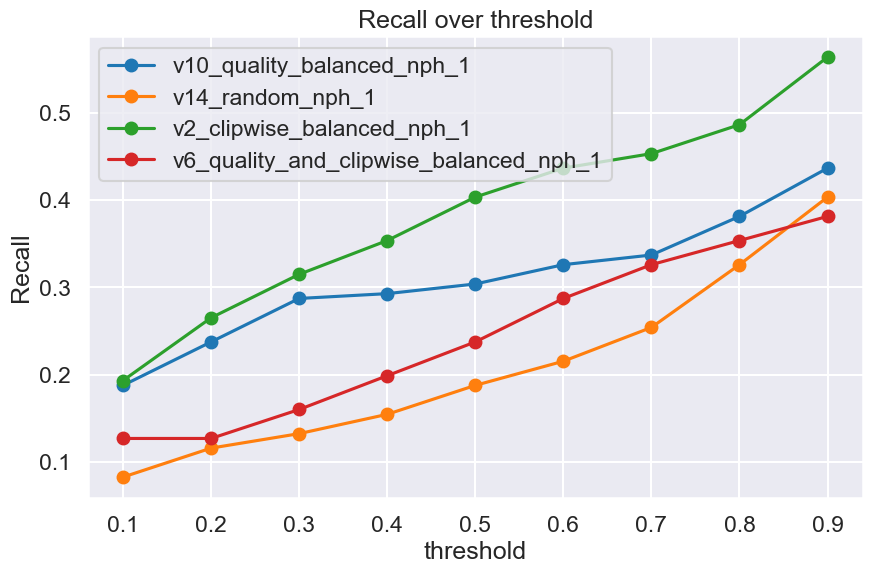

In [80]:
plt.figure(figsize=(10, 6))
for model, sub in df.groupby("model"):
    sub_sorted = sub.sort_values("threshold")
    plt.plot(sub_sorted["threshold"], sub_sorted["recall"], "-o", label=model)
plt.xlabel("threshold")
plt.ylabel("Recall")
plt.title("Recall over threshold")
plt.legend()
plt.grid(True)
plt.show()

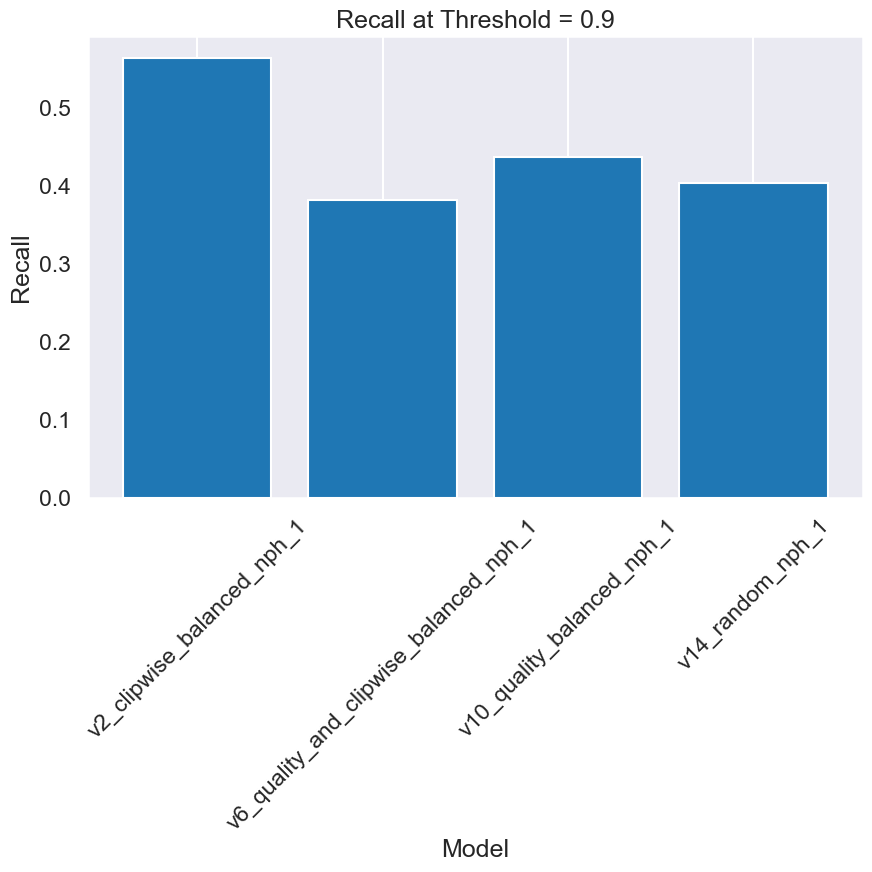

In [90]:
df_th90 = df[df["threshold"] == 0.9]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_th90["model"], df_th90["recall"])
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Recall at Threshold = 0.9")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

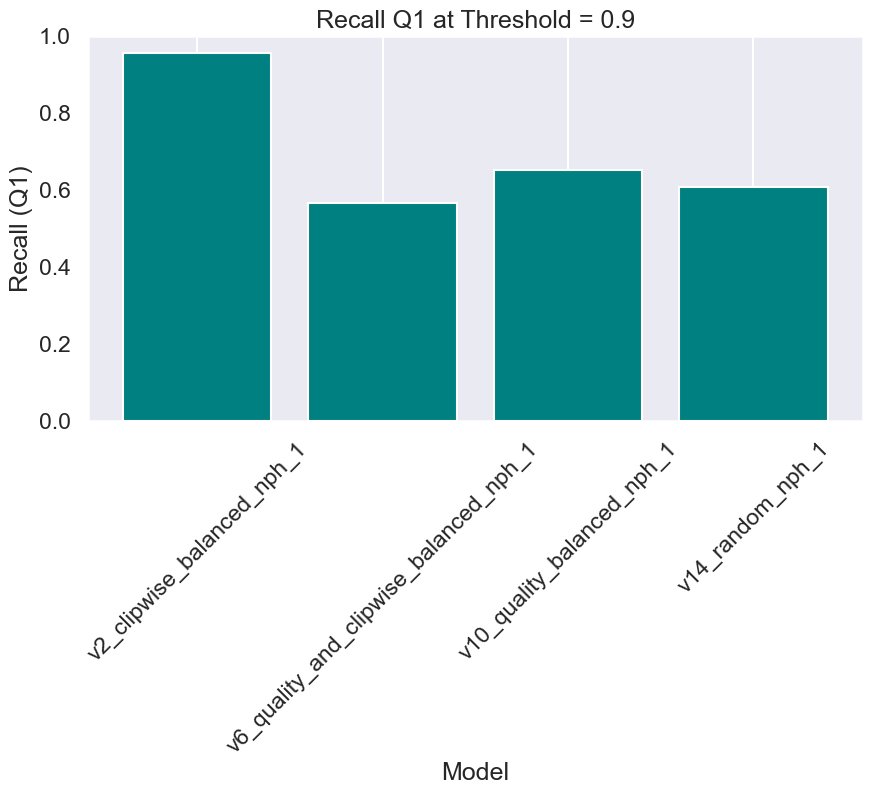

In [92]:
plt.figure(figsize=(10, 5))
plt.bar(df_th90["model"], df_th90["recall_q1"], color="teal")
plt.title("Recall Q1 at Threshold = 0.9")
plt.xlabel("Model")
plt.ylabel("Recall (Q1)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

## Recall vs. threshold for each quality (Q1–Q3)

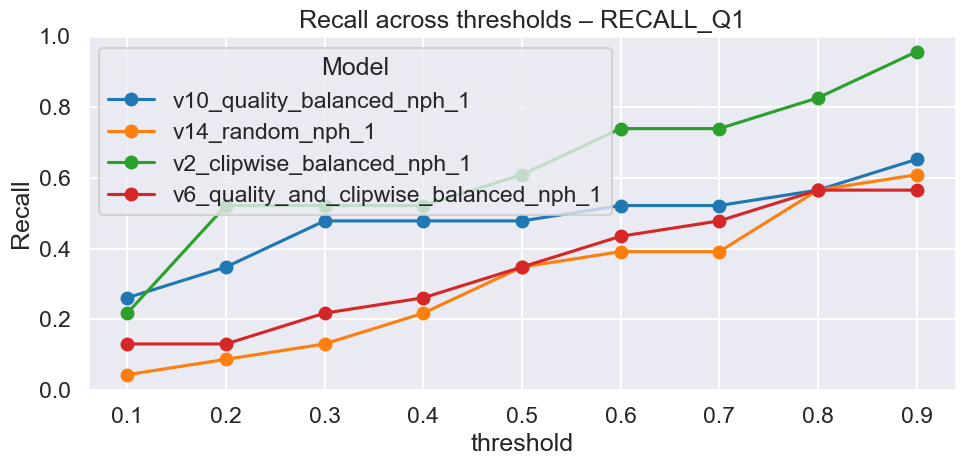

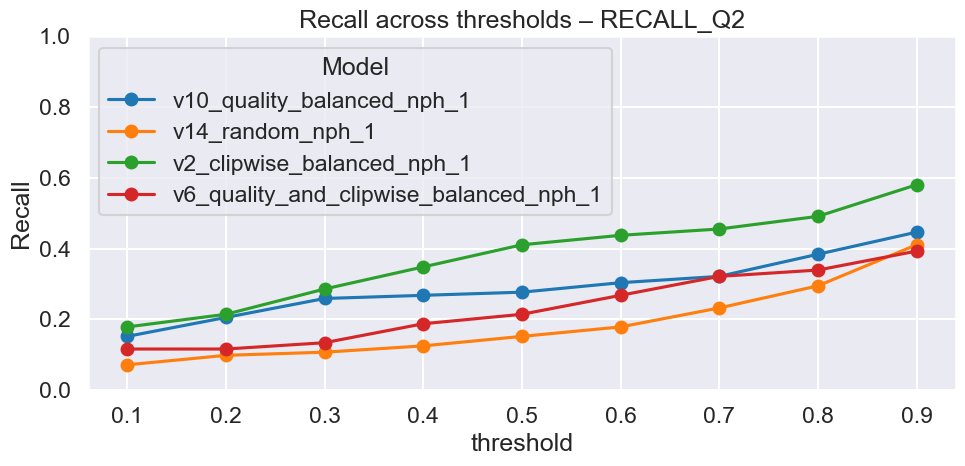

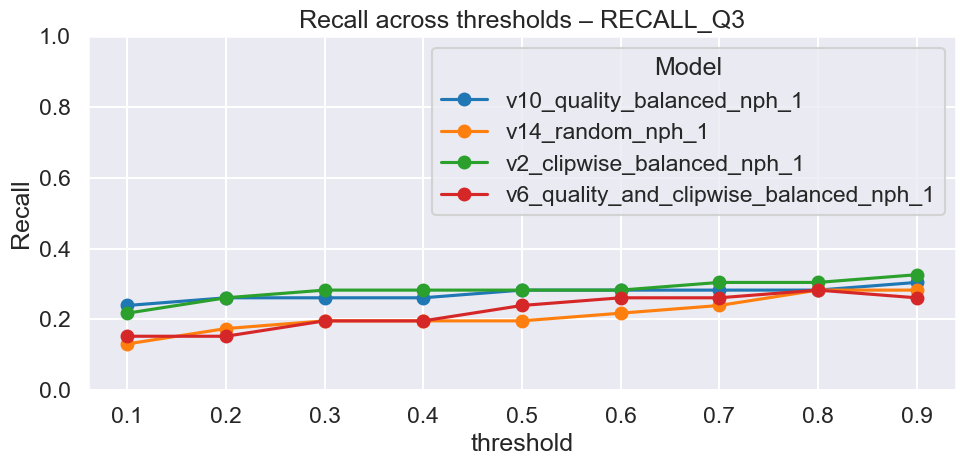

In [81]:
qualities = ["recall_q1", "recall_q2", "recall_q3"]

for q in qualities:
    if q in df.columns:
        plt.figure(figsize=(10, 5))
        for model, sub in df.groupby("model"):
            sub_sorted = sub.sort_values("threshold")
            plt.plot(
                sub_sorted["threshold"],
                sub_sorted[q],
                marker="o",
                label=model
            )
        plt.title(f"Recall across thresholds – {q.upper()}")
        plt.xlabel("threshold")
        plt.ylabel("Recall")
        plt.ylim(0, 1)
        plt.grid(True)
        plt.legend(title="Model")
        plt.tight_layout()
        plt.show()

### Detected calls vs. threshold (log scale)

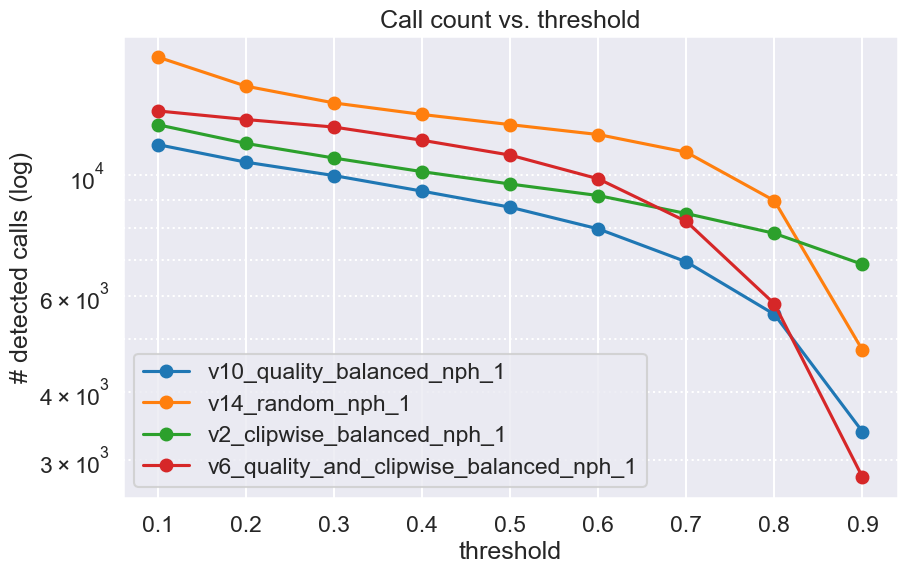

In [82]:
plt.figure(figsize=(10, 6))
for model, sub in df.groupby("model"):
    sub_sorted = sub.sort_values("threshold")
    plt.plot(sub_sorted["threshold"], sub_sorted["n_pred"], "-o", label=model)
plt.xlabel("threshold")
plt.ylabel("# detected calls (log)")
plt.yscale("log")
plt.title("Call count vs. threshold")
plt.legend()
plt.grid(True, which="both", axis="y", linestyle=":")
plt.show()

### Top‑5 variants by F1

In [83]:
leader.head(5).style.format({"precision": "{:.2%}", "recall": "{:.2%}", "f1": "{:.2%}"})

,model,variant,precision,recall,f1,mean_dstart_ms,mean_dend_ms
17,v6_quality_and_clipwise_balanced_nph_1,len400_hop050_th90,2.47%,38.12%,4.65%,236.797101,236.753623
26,v10_quality_balanced_nph_1,len400_hop050_th90,2.34%,43.65%,4.44%,234.037975,185.531646
35,v14_random_nph_1,len400_hop050_th90,1.53%,40.33%,2.95%,244.273973,227.027397
8,v2_clipwise_balanced_nph_1,len400_hop050_th90,1.49%,56.35%,2.90%,201.627451,121.176471
25,v10_quality_balanced_nph_1,len400_hop050_th80,1.24%,38.12%,2.41%,276.956522,221.304348


### F1 vs. threshold curve for each model

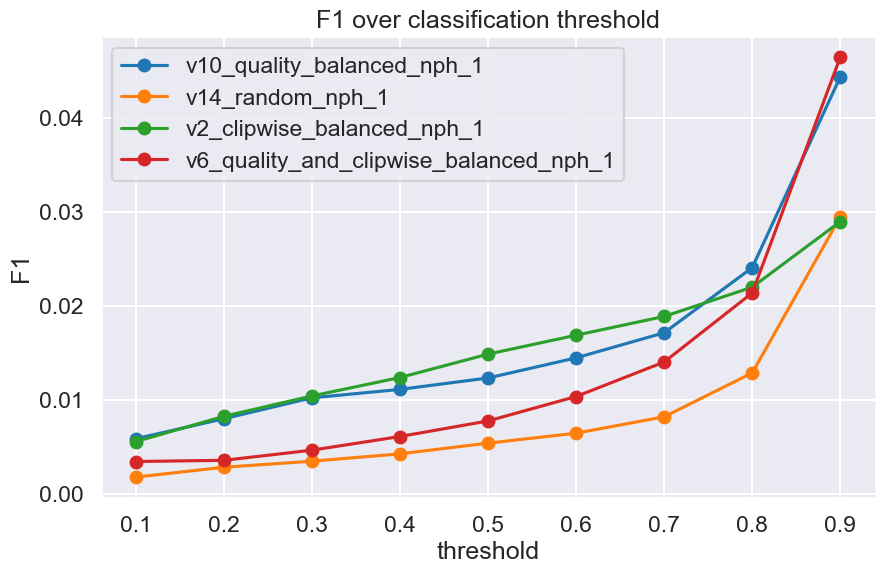

In [84]:
plt.figure(figsize=(10, 6))
for model, sub in df.groupby("model"):
    sub_sorted = sub.sort_values("threshold")
    plt.plot(sub_sorted["threshold"], sub_sorted["f1"], "-o", label=model)
plt.xlabel("threshold")
plt.ylabel("F1")
plt.title("F1 over classification threshold")
plt.legend()
plt.grid(True)
plt.show()

### Boundary error distributions

/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_50439/2382098644.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yy/mfzpfh1n7vsdd7qnk0wl69700000gn/T/ipykernel_50439/2382098644.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


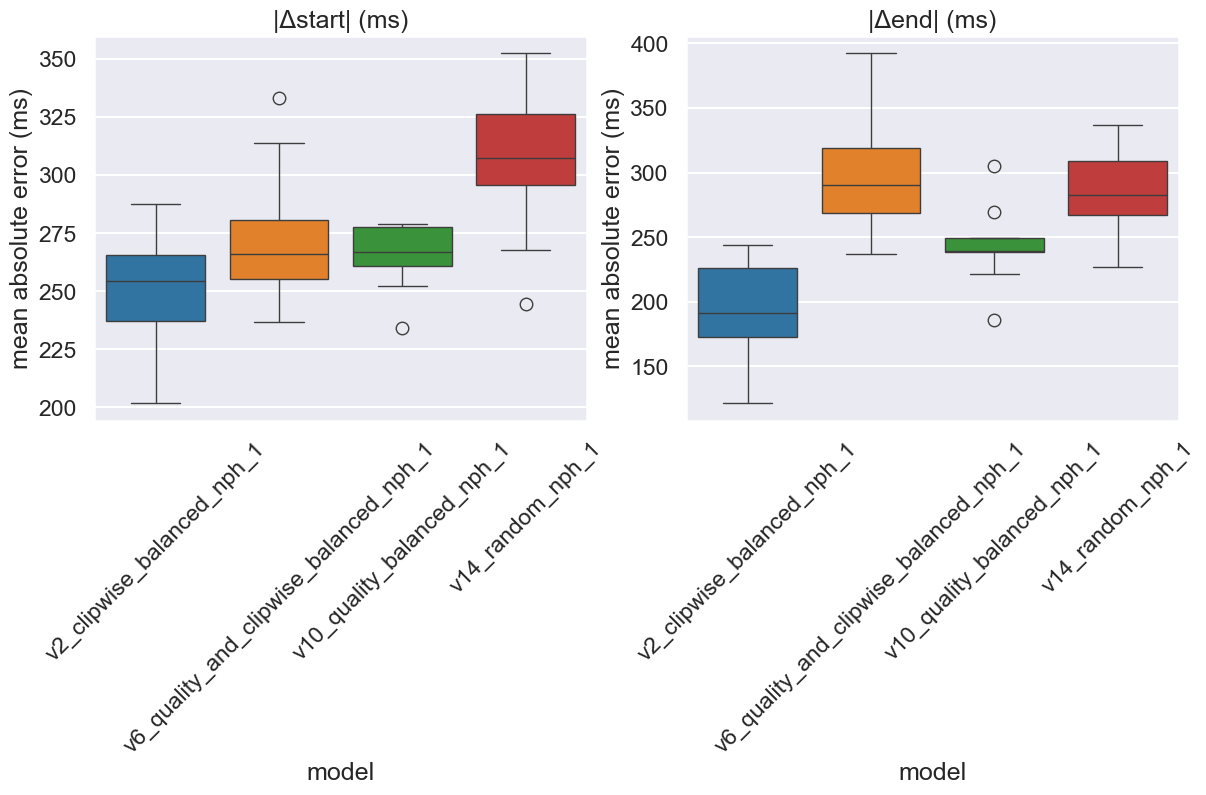

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically get unique model names in the order they appear
model_order = df["model"].unique()

# Generate a color palette with as many colors as there are models
custom_palette = sns.color_palette("tab10", n_colors=len(model_order))
palette_dict = dict(zip(model_order, custom_palette))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    x="model",
    y="mean_dstart_ms",
    data=df,
    ax=axs[0],
    palette=palette_dict,
    order=model_order
)
axs[0].set_title("|Δstart| (ms)")
axs[0].set_ylabel("mean absolute error (ms)")
axs[0].tick_params(axis='x', rotation=45)

sns.boxplot(
    x="model",
    y="mean_dend_ms",
    data=df,
    ax=axs[1],
    palette=palette_dict,
    order=model_order
)
axs[1].set_title("|Δend| (ms)")
axs[1].set_ylabel("mean absolute error (ms)")
axs[1].tick_params(axis='x', rotation=45)

#plt.tight_layout()
plt.show()